Test accuracy: 0.74
[[279  81]
 [ 92 208]]


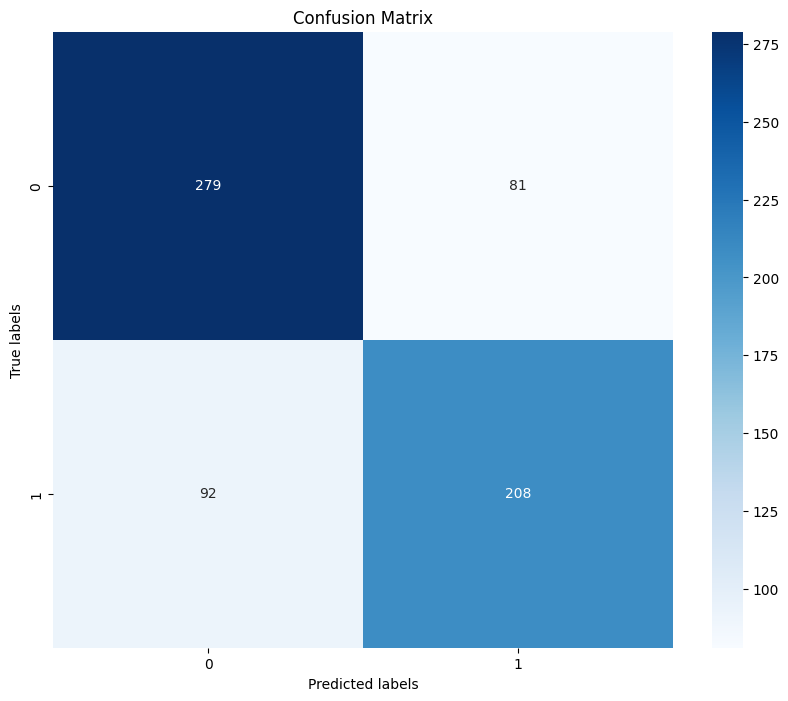

              precision    recall  f1-score   support

      benign       0.75      0.78      0.76       360
   malignant       0.72      0.69      0.71       300

    accuracy                           0.74       660
   macro avg       0.74      0.73      0.73       660
weighted avg       0.74      0.74      0.74       660

Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 score: 0.74
Specificity: 0.78


In [ ]:
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the path to the training and testing folders
train_dir = '/content/drive/MyDrive/Small_skin/train'
test_dir = '/content/drive/MyDrive/Small_skin/test'

# Set the image size
img_size = (28, 28)

# Load the training and testing images
train_images = []
train_labels = []
for folder in os.listdir(train_dir):
   for file in os.listdir(os.path.join(train_dir, folder)):
      img = cv2.imread(os.path.join(train_dir, folder, file))
      img = cv2.resize(img, img_size)
      train_images.append(img)
      train_labels.append(folder)

test_images = []
test_labels = []
for folder in os.listdir(test_dir):
  for file in os.listdir(os.path.join(test_dir, folder)):
      img = cv2.imread(os.path.join(test_dir, folder, file))
      img = cv2.resize(img, img_size)
      test_images.append(img)
      test_labels.append(folder)

# Convert the images to numpy arrays
train_images = np.array(train_images)
test_images = np.array(test_images)

# Reshape the images to 1D arrays
train_images = train_images.reshape(-1, img_size[0]*img_size[1]*3)
test_images = test_images.reshape(-1, img_size[0]*img_size[1]*3)

# Create an SVM model
svm = SVC(kernel='linear', C=1)

# Train the SVM model
svm.fit(train_images, train_labels)

# Evaluate the SVM model on the test data
test_pred = svm.predict(test_images)
test_acc = np.mean(test_pred == test_labels)
print(f'Test accuracy: {test_acc:.2f}')

# Create a confusion matrix
conf_mat = confusion_matrix(test_labels, test_pred)
print(conf_mat)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
report = classification_report(test_labels, test_pred)
print(report)

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(test_labels, test_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(test_labels, test_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Calculate F1 score
f1 = f1_score(test_labels, test_pred, average='weighted')
print(f'F1 score: {f1:.2f}')

# Calculate specificity
tn, fp, fn, tp = conf_mat.ravel()
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')